In [1]:
import awkward as ak
import numpy as np
import uproot
import nbimporter
import import_ipynb
import matplotlib.pyplot as plt
from hffrag import fixedbinning
from hffrag import binneddensity
import seaborn as sns
import DeepSetNeuralNet
from numpy.lib.recfunctions import structured_to_unstructured
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import mutual_info_regression

2022-11-29 16:47:05.853417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 16:47:06.010353: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-29 16:47:06.016722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-29 16:47:06.016736: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

number of jets to train on:
141329


/home/physics/phujdj/DeepLearningParticlePhysics/hffrag.py:136: RuntimeWarning: overflow encountered in sinh
  pzs = numpy.where(mask, pts, pts * numpy.sinh(etas))


In [2]:
%matplotlib inline
#plt.rcParams['axes.facecolor'] = 'white'
#plt.rcParams['savefig.facecolor'] = 'red'
#plt.rc('text',usetex = False)
#plt.rc('font',family = 'Times New Roman')
#%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
sns.set_theme(style = "ticks")

In [3]:
#The data is being stored in a tree datastructure. 
#We access the charm root using this command
tree = uproot.open("hffrag.root:CharmAnalysis")

In [4]:
# Select the features we wish to study
track_features = ["AnalysisTracks_pt", "AnalysisTracks_eta", "AnalysisTracks_phi", "AnalysisTracks_z0sinTheta",
                  "AnalysisTracks_d0sig", "AnalysisTracks_d0", "AnalysisTracks_d0sigPV", "AnalysisTracks_d0PV"]
jet_features = ["AnalysisAntiKt4TruthJets_pt", "AnalysisAntiKt4TruthJets_eta", "AnalysisAntiKt4TruthJets_phi",
                "AnalysisAntiKt4TruthJets_ghostB_pt", "AnalysisAntiKt4TruthJets_ghostB_eta","AnalysisAntiKt4TruthJets_ghostB_phi"]

MAXEVENTS = 1e20
MAXTRACKS = 32
MASKVAL = 0

In [5]:
def make_mi_scores(X,y):
    mi_scores = mutual_info_regression(X,y)
    mi_scores = pd.Series(mi_scores,name = "MI Scores",index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width,ticks)
    plt.title("Mutual Informarion Scores")

In [6]:
#Read in the data from the root file
features = tree.arrays(jet_features+track_features,entry_stop = MAXEVENTS)

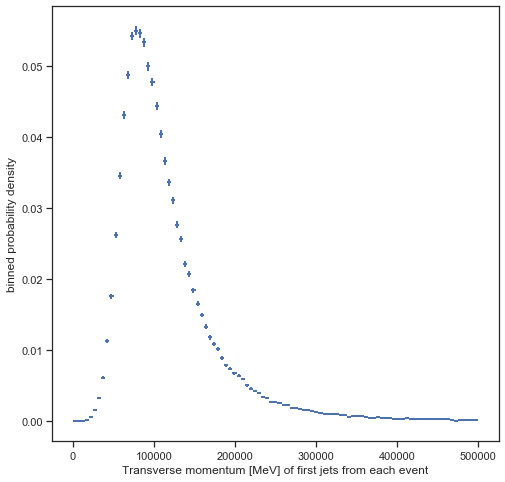

<Figure size 432x288 with 0 Axes>

In [7]:
Figure = plt.figure()
jet_pt_distribution = binneddensity(features["AnalysisAntiKt4TruthJets_pt"][:,0],fixedbinning(0,500000,100),xlabel = "Transverse momentum [MeV] of first jets from each event")
jet_pt_distribution

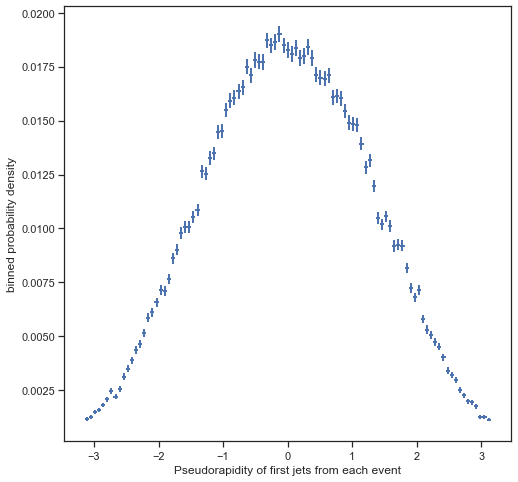

<Figure size 432x288 with 0 Axes>

In [8]:
Figure = plt.figure()
jet_pt_distribution = binneddensity(features["AnalysisAntiKt4TruthJets_eta"][:,0],fixedbinning(-np.pi,np.pi,100),xlabel = "Pseudorapidity of first jets from each event")
jet_pt_distribution

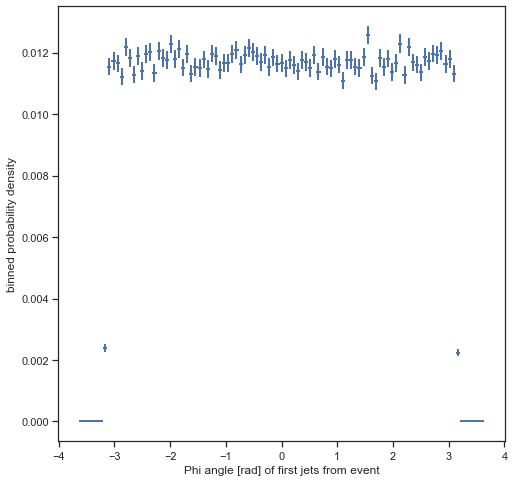

<Figure size 432x288 with 0 Axes>

In [9]:
Figure = plt.figure()
jet_pt_distribution = binneddensity(features["AnalysisAntiKt4TruthJets_phi"][:,0],fixedbinning(-np.pi-0.5,np.pi+0.5,100),xlabel = "Phi angle [rad] of first jets from event")
jet_pt_distribution

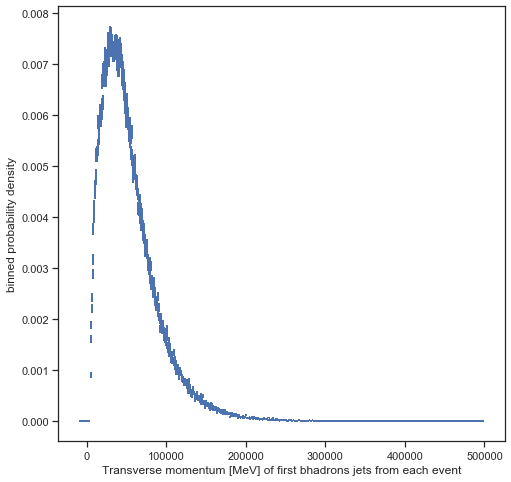

<Figure size 432x288 with 0 Axes>

In [10]:
Figure = plt.figure()
bhadrons = ak.flatten(features["AnalysisAntiKt4TruthJets_ghostB_pt"],axis = None)
jet_bhadron_pt_distribution = binneddensity(bhadrons,fixedbinning(-10000,500000,1000),xlabel = "Transverse momentum [MeV] of first bhadrons jets from each event")
jet_bhadron_pt_distribution

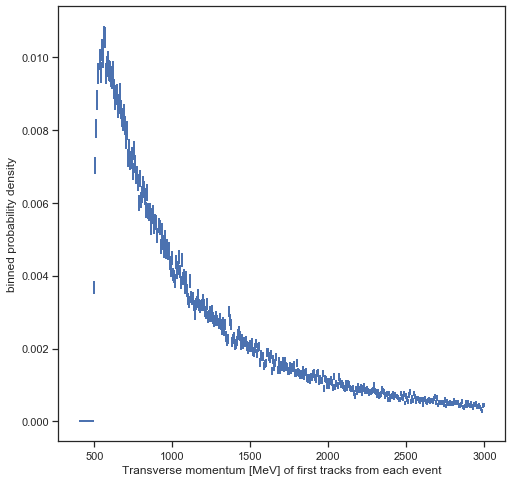

<Figure size 432x288 with 0 Axes>

In [11]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_pt"][:,0],fixedbinning(400,3000,400),xlabel = "Transverse momentum [MeV] of first tracks from each event")
Tracks_pt

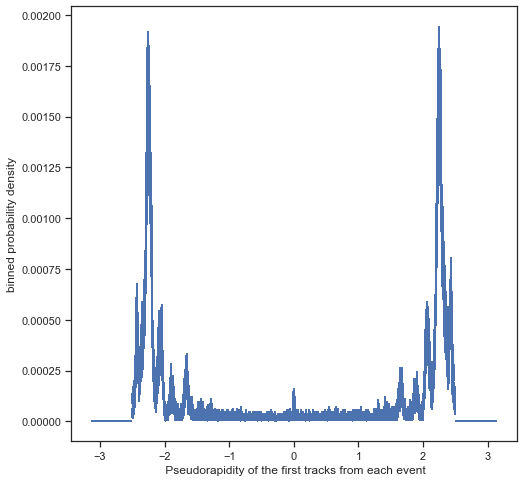

<Figure size 432x288 with 0 Axes>

In [12]:
Figure = plt.figure()
Tracks_eta = binneddensity(features["AnalysisTracks_eta"][:,0],fixedbinning(-np.pi,np.pi,10000),xlabel = " Pseudorapidity of the first tracks from each event")
Tracks_eta

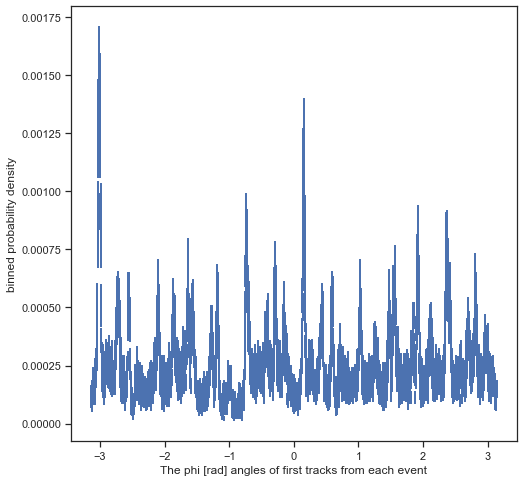

<Figure size 432x288 with 0 Axes>

In [13]:
Figure = plt.figure()
Tracks_phi = binneddensity(features["AnalysisTracks_phi"][:,0],fixedbinning(-np.pi,np.pi,4000),xlabel = "The phi [rad] angles of first tracks from each event")
Tracks_phi

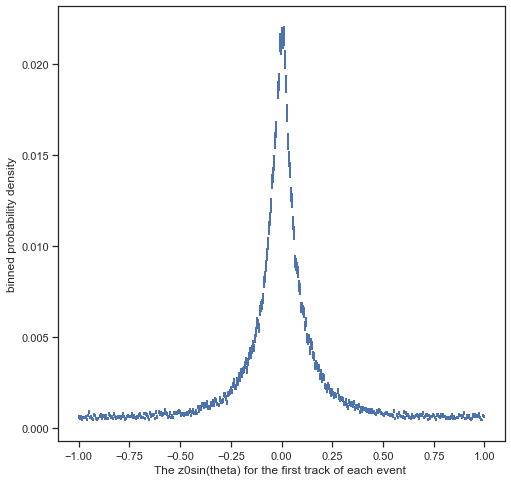

<Figure size 432x288 with 0 Axes>

In [14]:
Figure = plt.figure()
Tracks_z0_sin_theta = binneddensity(features["AnalysisTracks_z0sinTheta"][:,0],fixedbinning(-1,1,400),xlabel = "The z0sin(theta) for the first track of each event ")
Tracks_z0_sin_theta

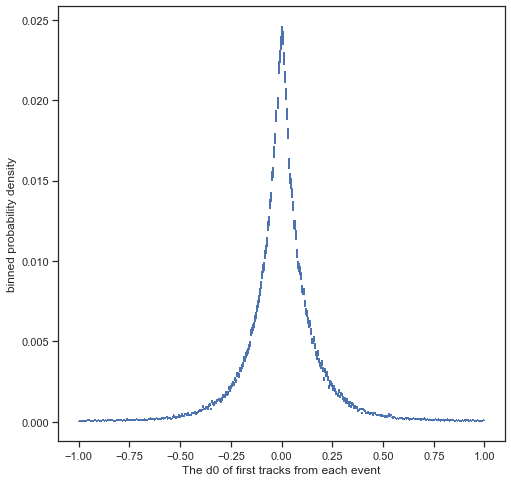

<Figure size 432x288 with 0 Axes>

In [15]:
Figure = plt.figure()
Tracks_z0 = binneddensity(features["AnalysisTracks_d0"][:,0],fixedbinning(-1,1,400),xlabel = "The d0 of first tracks from each event")
Tracks_z0

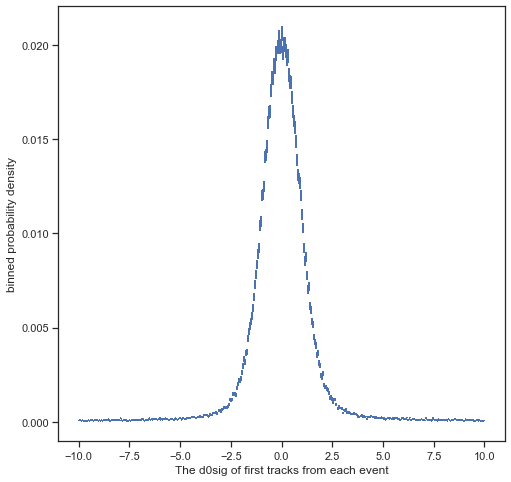

<Figure size 432x288 with 0 Axes>

In [16]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_d0sig"][:,0],fixedbinning(-10,10,400),xlabel = "The d0sig of first tracks from each event")
Tracks_pt

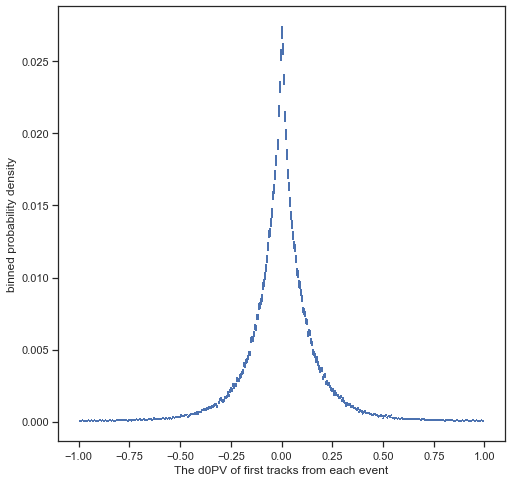

<Figure size 432x288 with 0 Axes>

In [17]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_d0PV"][:,0],fixedbinning(-1,1,400),xlabel = "The d0PV of first tracks from each event")
Tracks_pt

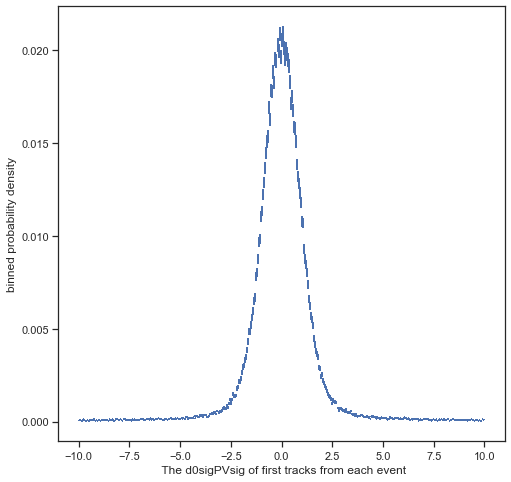

<Figure size 432x288 with 0 Axes>

In [18]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_d0sigPV"][:,0],fixedbinning(-10,10,400),xlabel = " The d0sigPVsig of first tracks from each event")
Tracks_pt

In [22]:
#Select the events of interest
events = features[ak.sum(features["AnalysisAntiKt4TruthJets_pt"] > 25000, axis = 1) > 0]
#Displays the number of jets being trained on
jets = events[jet_features][:,0]
print("The number of jets to train on is: ", len(jets))

#Select tracks from the events
tracks = events[track_features]

#Match the tracks to the jets
matchedtracks = tracks[DeepSetNeuralNet.Match_Tracks(jets,tracks)]

#Pad and Flatten the data
matchedtracks = DeepSetNeuralNet.flatten(matchedtracks, MAXTRACKS)

# Identify the the bottom jets and their associated tracks
bjets = ak.sum(jets["AnalysisAntiKt4TruthJets_ghostB_pt"] > 5000, axis=1) > 0
jets = jets[bjets]
bhads_pt = jets["AnalysisAntiKt4TruthJets_ghostB_pt"][:, 0].to_numpy()
bhads_eta = jets["AnalysisAntiKt4TruthJets_ghostB_eta"][:,0].to_numpy()
bhads_phi = jets["AnalysisAntiKt4TruthJets_ghostB_phi"][:,0].to_numpy()
bhads = np.stack([bhads_pt,bhads_eta,bhads_phi],axis = -1)

print("There are {} outputs".format(np.shape(bhads)[1]))
matchedtracks = matchedtracks[bjets]
print("There are {} inputs".format(np.shape(matchedtracks)[1]))

#Transform the jet and tracks to unstructed data.
jets = structured_to_unstructured(jets[jet_features[:-3]])
matchedtracks = structured_to_unstructured(matchedtracks)

#Fix the angles
jets = DeepSetNeuralNet.pt_eta_phi_2_px_py_pz_jets(jets).to_numpy()
tracks_p = DeepSetNeuralNet.pt_eta_phi_2_px_py_pz_tracks(matchedtracks.to_numpy())
bhads_cart = DeepSetNeuralNet.pt_eta_phi_2_px_py_pz_jets(bhads)
print(np.shape(tracks_p))
print(np.shape(matchedtracks[:, :, 3:]))
tracks = np.concatenate([tracks_p,matchedtracks[:,:,3:].to_numpy()],axis = 2)
print(np.shape(tracks))



The number of jets to train on is:  141329
There are 3 outputs
There are 32 inputs
(68143, 32, 3)
(68143, 32, 5)
(68143, 32, 8)


DeepSetNeuralNet.ipynb:16: RuntimeWarning: overflow encountered in sinh
  "2022-11-29 15:03:46.161984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory\n",


In [25]:
tracks[0,:,0]

array([ 6209.26450298,   332.31549738, 13929.08789537,   895.76702185,
         126.80887282,   137.88256407,   210.391507  ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ,
        -999.        ,  -999.        ,  -999.        ,  -999.        ])

In [190]:
tracks = np.ma.masked_equal(tracks, -999)
matchedtracks = np.ma.masked_equal(matchedtracks,-999)
print(tracks[0,:,1])
print(matchedtracks[0,:,1])
print(np.shape(tracks))
print(np.shape(matchedtracks))

[13355.344688608238 3367.861545684244 37259.159051845396
 1391.2043571633549 734.2551283331903 2120.7309000425666 5898.674895003703
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 --]
[0.7530462741851807 0.8005361557006836 0.8437681794166565
 0.9432456493377686 0.6490969061851501 0.952082633972168
 0.8386399149894714 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- --]
(68143, 32, 8)
(68143, 32, 8)


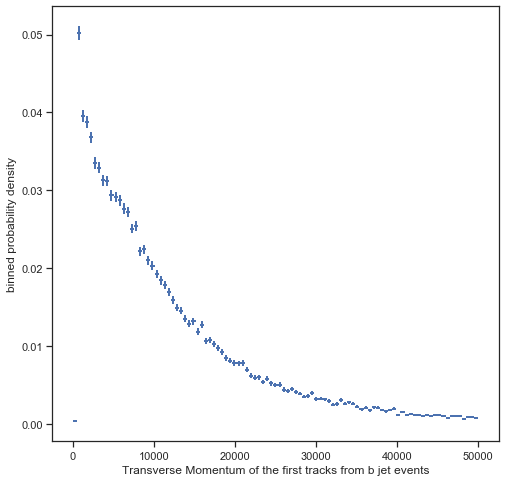

In [187]:
binneddensity(matchedtracks[:,0,0],fixedbinning(0,50000,100),xlabel = "Transverse Momentum of the first tracks from b jet events")

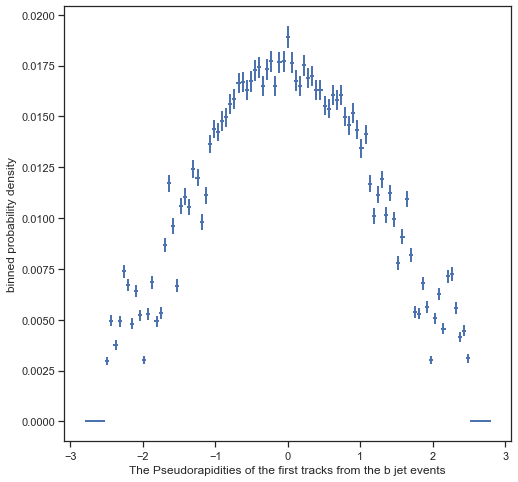

In [235]:
binneddensity(matchedtracks[:,0,1],fixedbinning(-2.8,2.8,100),xlabel = "The Pseudorapidities of the first tracks from the b jet events")

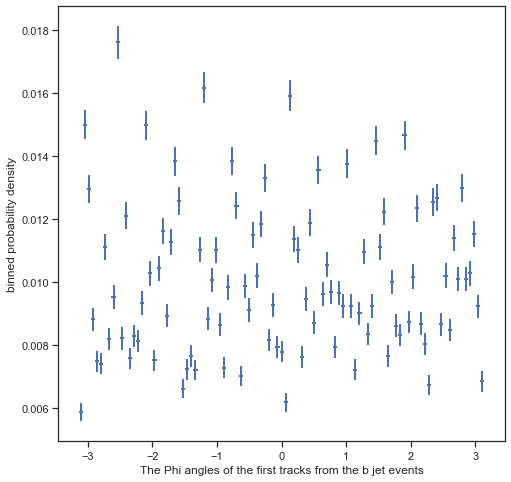

In [238]:
binneddensity(matchedtracks[:,0,2],fixedbinning(-np.pi,np.pi,100),xlabel = "The Phi angles of the first tracks from the b jet events")

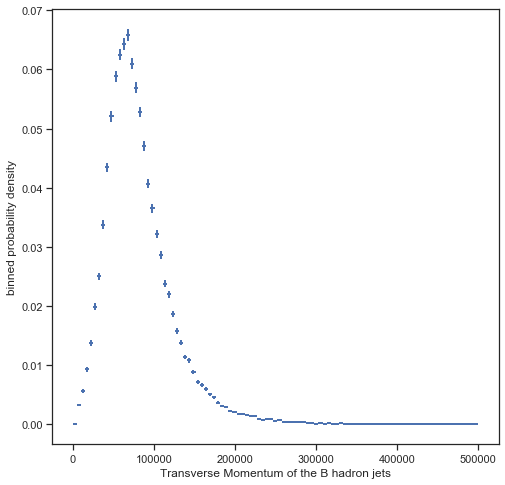

In [229]:
binneddensity(bhads[:,0],fixedbinning(0, 500000,100),xlabel = "Transverse Momentum of the B hadron jets")

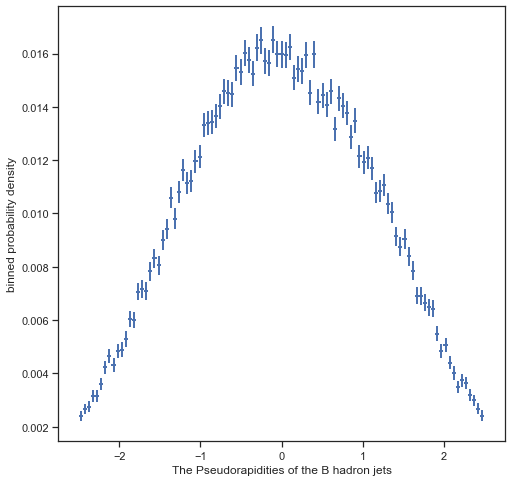

In [240]:
binneddensity(bhads[:,1],fixedbinning(-2.5, 2.5,100),xlabel = "The Pseudorapidities of the B hadron jets")

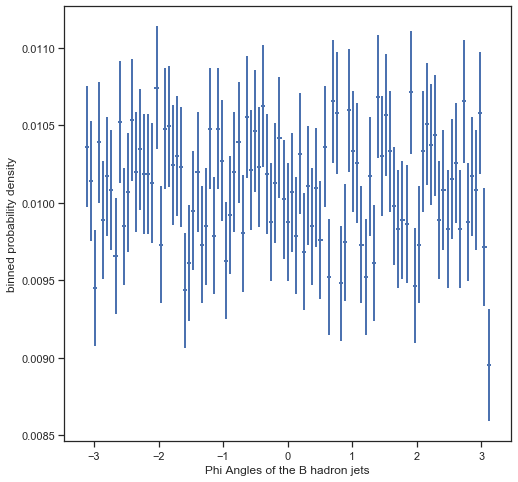

In [241]:
binneddensity(bhads[:,2],fixedbinning(-np.pi, np.pi,100),xlabel = "Phi Angles of the B hadron jets")

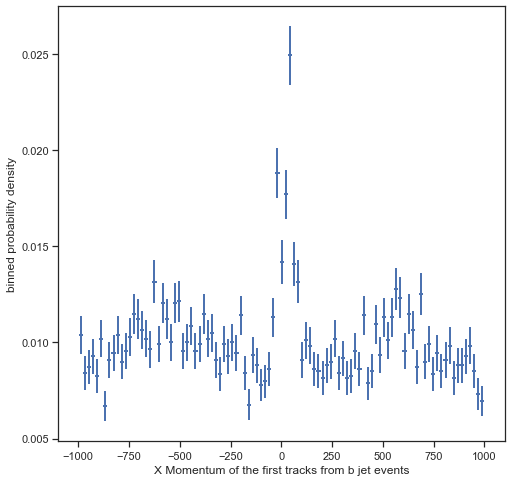

In [193]:
binneddensity(tracks[:,0,0],fixedbinning(-998, 1000,100),xlabel = "X Momentum of the first tracks from b jet events")

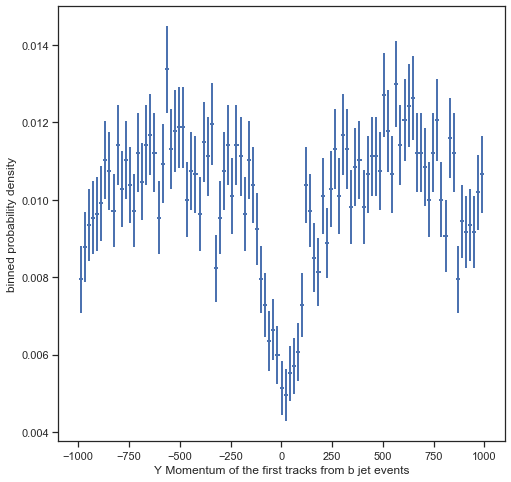

In [195]:
binneddensity(tracks[:,0,1],fixedbinning(-998, 1000,100),xlabel = "Y Momentum of the first tracks from b jet events")

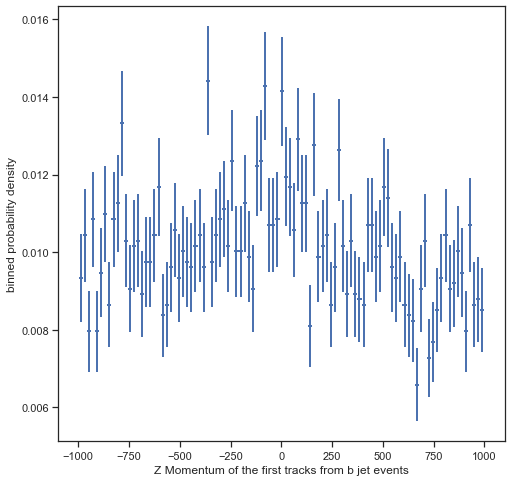

In [196]:
binneddensity(tracks[:,0,2],fixedbinning(-998, 1000,100),xlabel = "Z Momentum of the first tracks from b jet events")

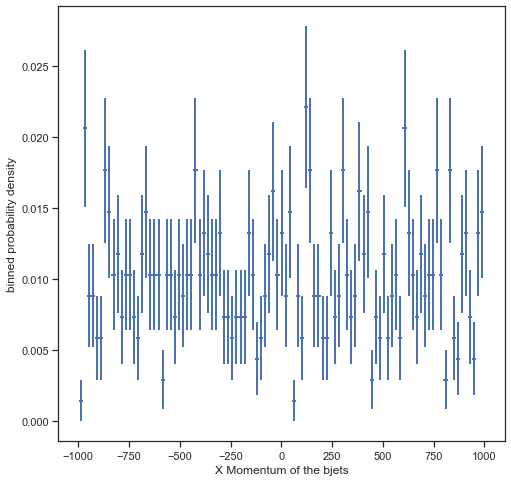

In [201]:
binneddensity(bhads_cart[:,0],fixedbinning(-998, 1000,100),xlabel = "X Momentum of the bjets")

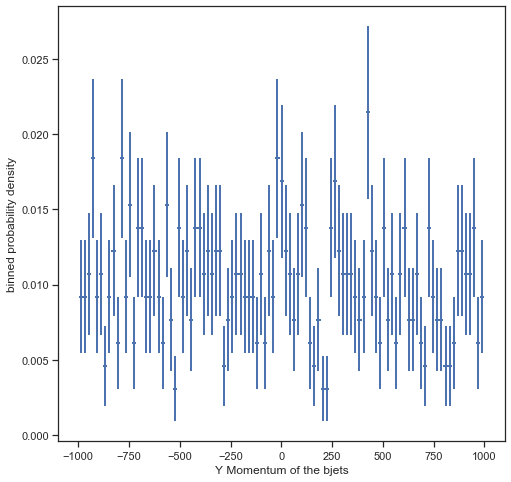

In [202]:
binneddensity(bhads_cart[:,1],fixedbinning(-998, 1000,100),xlabel = "Y Momentum of the bjets")

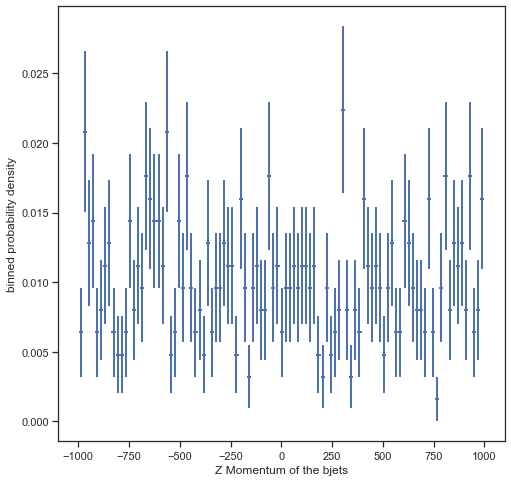

In [204]:
binneddensity(bhads_cart[:,2],fixedbinning(-998, 1000,100),xlabel = "Z Momentum of the bjets")

In [29]:
bhads[:,0]

array([137346.1875   ,  77138.359375 ,  98893.6328125, ...,
        98044.15625  , 135274.0625   ,  88550.7578125])

In [21]:
bhads_cart[:,0]

array([ 48855.56531144,    843.45625286, -77645.8243511 , ...,
        20683.59664168,  13327.7327702 ,  88487.99760843])

In [51]:
Track_Data = pd.DataFrame(data = matchedtracks[:,0,:],columns = ["AnalysisTracks_pt", "AnalysisTracks_pseudorapidity", "AnalysisTracks_phi_angles", "AnalysisTracks_z0sinTheta",
                  "AnalysisTracks_d0sig", "AnalysisTracks_d0", "AnalysisTracks_d0sigPV", "AnalysisTracks_d0PV"])
Track_Cart_Data = pd.DataFrame(data = tracks[:,0,:],columns = ["AnalysisTracks_px", "AnalysisTracks_py", "AnalysisTracks_pz", "AnalysisTracks_z0sinTheta",
                  "AnalysisTracks_d0sig", "AnalysisTracks_d0", "AnalysisTracks_d0sigPV", "AnalysisTracks_d0PV"])          
Bhad_Data = pd.DataFrame(data = bhads, columns = ["Transverse Momentum","Pseudorapidity","Phi Angle"] )
Bhad_Cart_Data = pd.DataFrame(data = bhads_cart, columns = ["Momentum_px","Momentum_py","Momentum_pz"])
Track_Cart_Data["AnalysisTracks_Momenta"] = np.sqrt(Track_Cart_Data["AnalysisTracks_px"]**2 + Track_Cart_Data["AnalysisTracks_py"]**2 + Track_Cart_Data["AnalysisTracks_pz"]**2)

In [52]:
Track_Data.head()

,AnalysisTracks_pt,AnalysisTracks_pseudorapidity,AnalysisTracks_phi_angles,AnalysisTracks_z0sinTheta,AnalysisTracks_d0sig,AnalysisTracks_d0,AnalysisTracks_d0sigPV,AnalysisTracks_d0PV
0,14728.210938,0.753046,1.135598,1.187540,75.535919,1.331107,85.745621,1.323915
1,36016.667969,1.574784,1.563545,0.176790,-5.868888,-0.082942,-7.405653,-0.083929
2,8141.662109,-2.309198,-2.568287,-0.540383,19.742092,0.509719,21.221720,0.529027
3,2862.209961,0.142131,-1.146653,-0.213600,0.751653,0.027052,0.676754,0.023648
4,7313.381836,-0.746391,-1.043679,0.029427,6.050011,0.128898,6.331607,0.126675


In [53]:
Track_Cart_Data.head()

,AnalysisTracks_px,AnalysisTracks_py,AnalysisTracks_pz,AnalysisTracks_z0sinTheta,AnalysisTracks_d0sig,AnalysisTracks_d0,AnalysisTracks_d0sigPV,AnalysisTracks_d0PV,AnalysisTracks_Momenta
0,6209.264503,13355.344689,12169.398049,1.187540,75.535919,1.331107,85.745621,1.323915,19105.351248
1,261.158163,36015.721123,83246.178704,0.176790,-5.868888,-0.082942,-7.405653,-0.083929,90703.509527
2,-6839.911990,-4416.136985,-40573.998871,-0.540383,19.742092,0.509719,21.221720,0.529027,41382.798918
3,1177.914844,-2608.593966,408.180684,-0.213600,0.751653,0.027052,0.676754,0.023648,2891.168852
4,3678.954003,-6320.668582,-5979.787404,0.029427,6.050011,0.128898,6.331607,0.126675,9446.873095


In [54]:
Bhad_Data.head()

,Transverse Momentum,Pseudorapidity,Phi Angle
0,137346.187500,0.816028,1.207121
1,77138.359375,1.581975,1.559862
2,98893.632812,-2.406116,-2.473726
3,31594.050781,0.112686,-1.107978
4,34662.535156,-0.701888,-0.968519


In [55]:
Bhad_Cart_Data.head()

,Momentum_px,Momentum_py,Momentum_pz
0,48855.565311,128363.191604,124938.017907
1,843.456253,77133.747923,179693.161233
2,-77645.824351,-61246.033110,-543946.691984
3,14105.863721,-28270.278623,3567.737679
4,19637.044949,-28563.574866,-26376.603315


In [57]:
Track_Data.describe()

,AnalysisTracks_pt,AnalysisTracks_pseudorapidity,AnalysisTracks_phi_angles,AnalysisTracks_z0sinTheta,AnalysisTracks_d0sig,AnalysisTracks_d0,AnalysisTracks_d0sigPV,AnalysisTracks_d0PV
count,66738.000000,66738.000000,66738.000000,66738.000000,66738.000000,66738.000000,66738.000000,66738.000000
mean,12885.084836,-0.004638,-0.000510,-0.005433,0.057434,0.005795,0.053293,0.005871
std,14511.490054,1.160254,1.811670,0.682878,15.965399,0.466321,17.939524,0.466276
min,500.322388,-2.499928,-3.141057,-4.996285,-193.585464,-8.974319,-204.926285,-8.985221
25%,3919.992554,-0.853970,-1.593016,-0.088766,-2.339169,-0.065563,-2.440143,-0.064645
50%,8653.381348,-0.013762,0.004065,0.000512,0.020515,0.000596,0.025150,0.000584
75%,16797.341309,0.850452,1.558311,0.088468,2.494241,0.066739,2.626203,0.066258
max,526063.500000,2.499782,3.141564,4.997464,187.984756,20.201757,198.400864,20.204912


In [58]:
Track_Cart_Data.describe()

,AnalysisTracks_px,AnalysisTracks_py,AnalysisTracks_pz,AnalysisTracks_z0sinTheta,AnalysisTracks_d0sig,AnalysisTracks_d0,AnalysisTracks_d0sigPV,AnalysisTracks_d0PV,AnalysisTracks_Momenta
count,66738.000000,66738.000000,6.673800e+04,66738.000000,66738.000000,66738.000000,66738.000000,66738.000000,6.673800e+04
mean,-56.044618,-27.102838,5.234784e+01,-0.005433,0.057434,0.005795,0.053293,0.005871,2.159932e+04
std,13688.616431,13756.058562,2.991713e+04,0.682878,15.965399,0.466321,17.939524,0.466276,2.837448e+04
min,-272141.930911,-389159.699607,-1.240535e+06,-4.996285,-193.585464,-8.974319,-204.926285,-8.985221,5.188686e+02
25%,-4718.807483,-4752.740799,-7.134857e+03,-0.088766,-2.339169,-0.065563,-2.440143,-0.064645,6.282198e+03
50%,-5.333368,10.302739,-7.225397e+01,0.000512,0.020515,0.000596,0.025150,0.000584,1.341767e+04
75%,4635.265029,4752.743097,7.190989e+03,0.088468,2.494241,0.066739,2.626203,0.066258,2.663112e+04
max,390710.872605,507209.713285,1.332515e+06,4.997464,187.984756,20.201757,198.400864,20.204912,1.354429e+06


In [59]:
Bhad_Data.describe()

,Transverse Momentum,Pseudorapidity,Phi Angle
count,68143.000000,68143.000000,68143.000000
mean,82054.536180,-0.005635,-0.004479
std,42392.321525,1.224954,1.812494
min,5019.133301,-4.383445,-3.141570
25%,54308.017578,-0.873790,-1.581013
50%,74180.585938,-0.017047,-0.013233
75%,100655.160156,0.866571,1.564018
max,777955.875000,4.218462,3.141497


In [60]:
Bhad_Cart_Data.describe()

,Momentum_px,Momentum_py,Momentum_pz
count,68143.000000,68143.000000,6.814300e+04
mean,112.720367,-71.421224,-6.793137e+02
std,65191.731859,65423.045860,1.976745e+05
min,-526610.789047,-467837.234722,-2.273167e+06
25%,-45323.375211,-45850.216723,-7.154900e+04
50%,-65.921698,-402.773586,-1.087164e+03
75%,45619.115852,45385.044962,7.126016e+04
max,632499.053069,777843.099727,1.827357e+06


In [62]:
Track_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68143 entries, 0 to 68142
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AnalysisTracks_pt              66738 non-null  float64
 1   AnalysisTracks_pseudorapidity  66738 non-null  float64
 2   AnalysisTracks_phi_angles      66738 non-null  float64
 3   AnalysisTracks_z0sinTheta      66738 non-null  float64
 4   AnalysisTracks_d0sig           66738 non-null  float64
 5   AnalysisTracks_d0              66738 non-null  float64
 6   AnalysisTracks_d0sigPV         66738 non-null  float64
 7   AnalysisTracks_d0PV            66738 non-null  float64
dtypes: float64(8)
memory usage: 4.2 MB


In [63]:
Track_Cart_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68143 entries, 0 to 68142
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AnalysisTracks_px          66738 non-null  float64
 1   AnalysisTracks_py          66738 non-null  float64
 2   AnalysisTracks_pz          66738 non-null  float64
 3   AnalysisTracks_z0sinTheta  66738 non-null  float64
 4   AnalysisTracks_d0sig       66738 non-null  float64
 5   AnalysisTracks_d0          66738 non-null  float64
 6   AnalysisTracks_d0sigPV     66738 non-null  float64
 7   AnalysisTracks_d0PV        66738 non-null  float64
 8   AnalysisTracks_Momenta     66738 non-null  float64
dtypes: float64(9)
memory usage: 4.7 MB


In [64]:
Bhad_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68143 entries, 0 to 68142
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transverse Momentum  68143 non-null  float64
 1   Pseudorapidity       68143 non-null  float64
 2   Phi Angle            68143 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


In [65]:
Bhad_Cart_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68143 entries, 0 to 68142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Momentum_px  68143 non-null  float64
 1   Momentum_py  68143 non-null  float64
 2   Momentum_pz  68143 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


In [121]:
Data = pd.concat([Track_Data,Bhad_Data],axis = 1)
Data_Cart = pd.concat([Track_Cart_Data,Bhad_Cart_Data], axis = 1)

In [123]:
Data = Data[Data.AnalysisTracks_pt != -999]
Data_Cart = Data_Cart[Data_Cart.AnalysisTracks_px != -999]
Data.dropna(inplace = True)
Data_Cart.dropna(inplace = True)

In [125]:
Data.head()

,AnalysisTracks_pt,AnalysisTracks_pseudorapidity,AnalysisTracks_phi_angles,AnalysisTracks_z0sinTheta,AnalysisTracks_d0sig,AnalysisTracks_d0,AnalysisTracks_d0sigPV,AnalysisTracks_d0PV,Transverse Momentum,Pseudorapidity,Phi Angle
0,14728.210938,0.753046,1.135598,1.187540,75.535919,1.331107,85.745621,1.323915,137346.187500,0.816028,1.207121
1,36016.667969,1.574784,1.563545,0.176790,-5.868888,-0.082942,-7.405653,-0.083929,77138.359375,1.581975,1.559862
2,8141.662109,-2.309198,-2.568287,-0.540383,19.742092,0.509719,21.221720,0.529027,98893.632812,-2.406116,-2.473726
3,2862.209961,0.142131,-1.146653,-0.213600,0.751653,0.027052,0.676754,0.023648,31594.050781,0.112686,-1.107978
4,7313.381836,-0.746391,-1.043679,0.029427,6.050011,0.128898,6.331607,0.126675,34662.535156,-0.701888,-0.968519


In [126]:
Data_Cart.head()

,AnalysisTracks_px,AnalysisTracks_py,AnalysisTracks_pz,AnalysisTracks_z0sinTheta,AnalysisTracks_d0sig,AnalysisTracks_d0,AnalysisTracks_d0sigPV,AnalysisTracks_d0PV,AnalysisTracks_Momenta,Momentum_px,Momentum_py,Momentum_pz
0,6209.264503,13355.344689,12169.398049,1.187540,75.535919,1.331107,85.745621,1.323915,19105.351248,48855.565311,128363.191604,124938.017907
1,261.158163,36015.721123,83246.178704,0.176790,-5.868888,-0.082942,-7.405653,-0.083929,90703.509527,843.456253,77133.747923,179693.161233
2,-6839.911990,-4416.136985,-40573.998871,-0.540383,19.742092,0.509719,21.221720,0.529027,41382.798918,-77645.824351,-61246.033110,-543946.691984
3,1177.914844,-2608.593966,408.180684,-0.213600,0.751653,0.027052,0.676754,0.023648,2891.168852,14105.863721,-28270.278623,3567.737679
4,3678.954003,-6320.668582,-5979.787404,0.029427,6.050011,0.128898,6.331607,0.126675,9446.873095,19637.044949,-28563.574866,-26376.603315


In [144]:
Track_Data = Data[["AnalysisTracks_pt","AnalysisTracks_pseudorapidity","AnalysisTracks_phi_angles","AnalysisTracks_z0sinTheta","AnalysisTracks_d0sig","AnalysisTracks_d0","AnalysisTracks_d0sigPV","AnalysisTracks_d0PV"]]
Track_Cart_Data = Data_Cart[["AnalysisTracks_px","AnalysisTracks_py","AnalysisTracks_pz","AnalysisTracks_z0sinTheta","AnalysisTracks_d0sig","AnalysisTracks_d0","AnalysisTracks_d0sigPV","AnalysisTracks_d0PV"]]
Bhad_Data = Data[["Transverse Momentum", "Pseudorapidity","Phi Angle"]]
Bhad_Cart_Data = Data_Cart[["Momentum_px","Momentum_py","Momentum_pz"]]

In [127]:
attributesA = ["AnalysisTracks_pt","AnalysisTracks_pseudorapidity","AnalysisTracks_phi_angles","Transverse Momentum"]
attributes2A = ["AnalysisTracks_z0sinTheta","AnalysisTracks_d0sig","AnalysisTracks_d0","AnalysisTracks_d0sigPV","Transverse Momentum"]

In [128]:
attributesB = ["AnalysisTracks_px","AnalysisTracks_py","AnalysisTracks_pz","Momentum_px","Momentum_py","Momentum_pz"]
attributes2B = ["AnalysisTracks_z0sinTheta","AnalysisTracks_d0sig","AnalysisTracks_d0","AnalysisTracks_d0sigPV","Momentum_px","Momentum_py","Momentum_pz"]

In [129]:
Data.AnalysisTracks_d0.describe()

count    66738.000000
mean         0.005795
std          0.466321
min         -8.974319
25%         -0.065563
50%          0.000596
75%          0.066739
max         20.201757
Name: AnalysisTracks_d0, dtype: float64

array([[<AxesSubplot:xlabel='AnalysisTracks_pt', ylabel='AnalysisTracks_pt'>,
        <AxesSubplot:xlabel='AnalysisTracks_pseudorapidity', ylabel='AnalysisTracks_pt'>,
        <AxesSubplot:xlabel='AnalysisTracks_phi_angles', ylabel='AnalysisTracks_pt'>,
        <AxesSubplot:xlabel='Transverse Momentum', ylabel='AnalysisTracks_pt'>],
       [<AxesSubplot:xlabel='AnalysisTracks_pt', ylabel='AnalysisTracks_pseudorapidity'>,
        <AxesSubplot:xlabel='AnalysisTracks_pseudorapidity', ylabel='AnalysisTracks_pseudorapidity'>,
        <AxesSubplot:xlabel='AnalysisTracks_phi_angles', ylabel='AnalysisTracks_pseudorapidity'>,
        <AxesSubplot:xlabel='Transverse Momentum', ylabel='AnalysisTracks_pseudorapidity'>],
       [<AxesSubplot:xlabel='AnalysisTracks_pt', ylabel='AnalysisTracks_phi_angles'>,
        <AxesSubplot:xlabel='AnalysisTracks_pseudorapidity', ylabel='AnalysisTracks_phi_angles'>,
        <AxesSubplot:xlabel='AnalysisTracks_phi_angles', ylabel='AnalysisTracks_phi_angles'>,
    

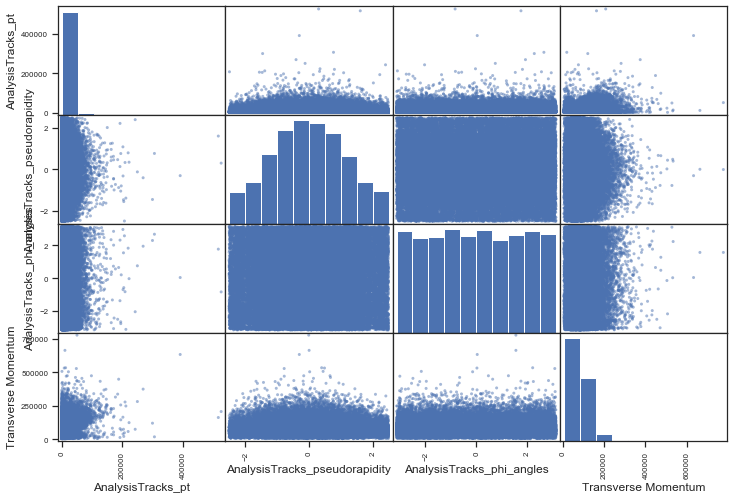

In [130]:
scatter_matrix(Data[attributesA],figsize = (12,8))

array([[<AxesSubplot:xlabel='AnalysisTracks_z0sinTheta', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sig', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sigPV', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='Transverse Momentum', ylabel='AnalysisTracks_z0sinTheta'>],
       [<AxesSubplot:xlabel='AnalysisTracks_z0sinTheta', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sig', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sigPV', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='Transverse Momentum', ylabel='AnalysisTracks_d0sig'>],
       [<AxesSubplot:xlabel='AnalysisTracks_z0sinTheta', ylabel='AnalysisTracks_d0'>,
        <AxesSubplot:xlabel='AnalysisTrac

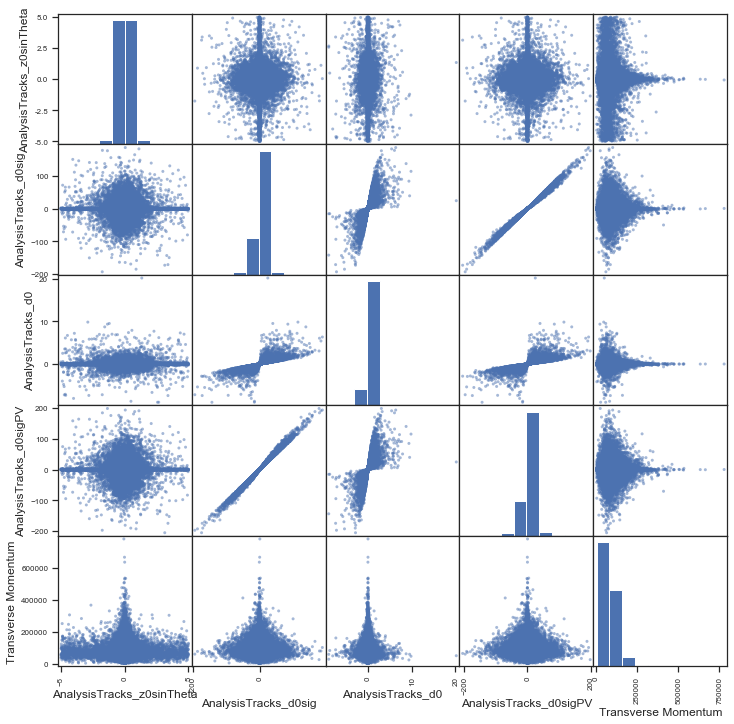

In [131]:
scatter_matrix(Data[attributes2A],figsize = (12,12))

array([[<AxesSubplot:xlabel='AnalysisTracks_px', ylabel='AnalysisTracks_px'>,
        <AxesSubplot:xlabel='AnalysisTracks_py', ylabel='AnalysisTracks_px'>,
        <AxesSubplot:xlabel='AnalysisTracks_pz', ylabel='AnalysisTracks_px'>,
        <AxesSubplot:xlabel='Momentum_px', ylabel='AnalysisTracks_px'>,
        <AxesSubplot:xlabel='Momentum_py', ylabel='AnalysisTracks_px'>,
        <AxesSubplot:xlabel='Momentum_pz', ylabel='AnalysisTracks_px'>],
       [<AxesSubplot:xlabel='AnalysisTracks_px', ylabel='AnalysisTracks_py'>,
        <AxesSubplot:xlabel='AnalysisTracks_py', ylabel='AnalysisTracks_py'>,
        <AxesSubplot:xlabel='AnalysisTracks_pz', ylabel='AnalysisTracks_py'>,
        <AxesSubplot:xlabel='Momentum_px', ylabel='AnalysisTracks_py'>,
        <AxesSubplot:xlabel='Momentum_py', ylabel='AnalysisTracks_py'>,
        <AxesSubplot:xlabel='Momentum_pz', ylabel='AnalysisTracks_py'>],
       [<AxesSubplot:xlabel='AnalysisTracks_px', ylabel='AnalysisTracks_pz'>,
        <AxesSubplot

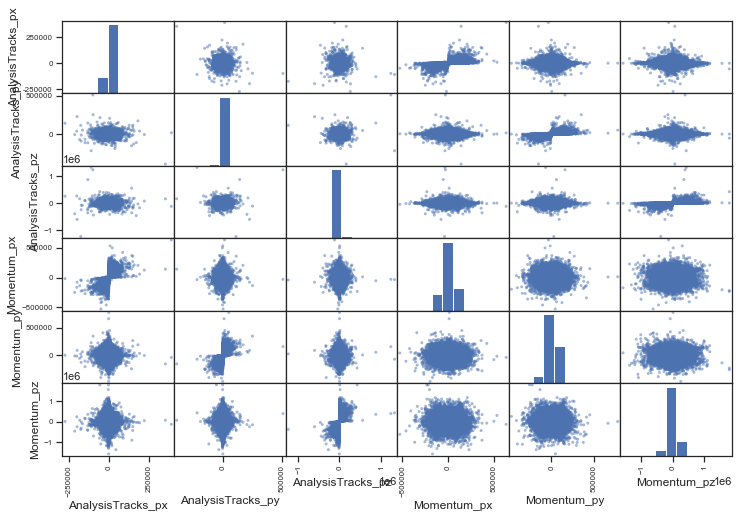

In [132]:
scatter_matrix(Data_Cart[attributesB],figsize = (12,8))

array([[<AxesSubplot:xlabel='AnalysisTracks_z0sinTheta', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sig', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sigPV', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='Momentum_px', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='Momentum_py', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='Momentum_pz', ylabel='AnalysisTracks_z0sinTheta'>],
       [<AxesSubplot:xlabel='AnalysisTracks_z0sinTheta', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sig', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sigPV', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='Momentum_px', ylabel='Analysis

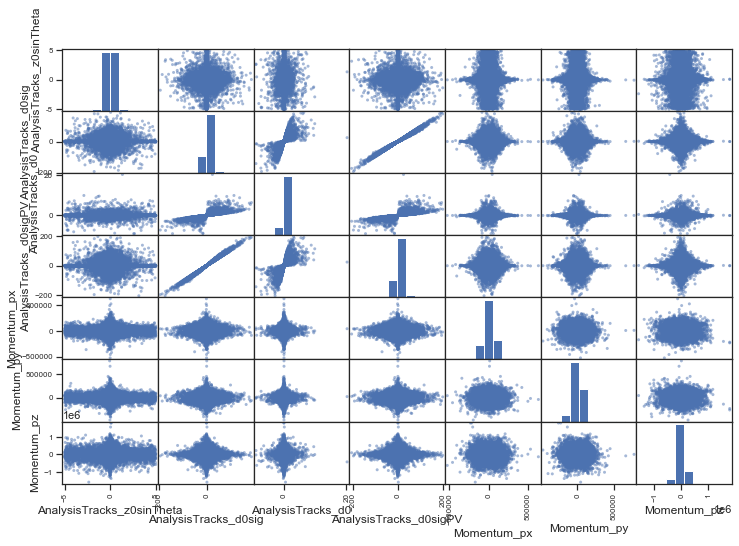

In [133]:
scatter_matrix(Data_Cart[attributes2B],figsize = (12,8))

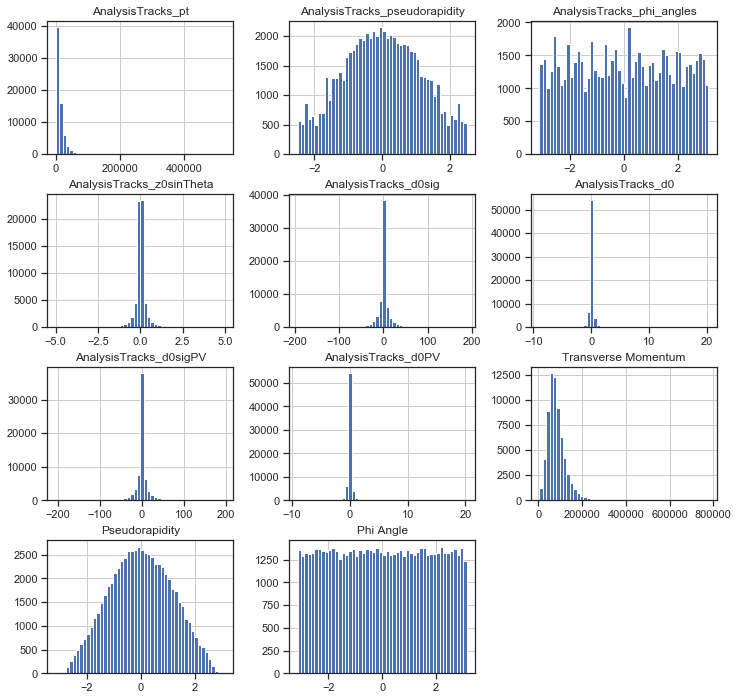

In [134]:
Data.hist(bins = 50,figsize = (12,12))
plt.show()

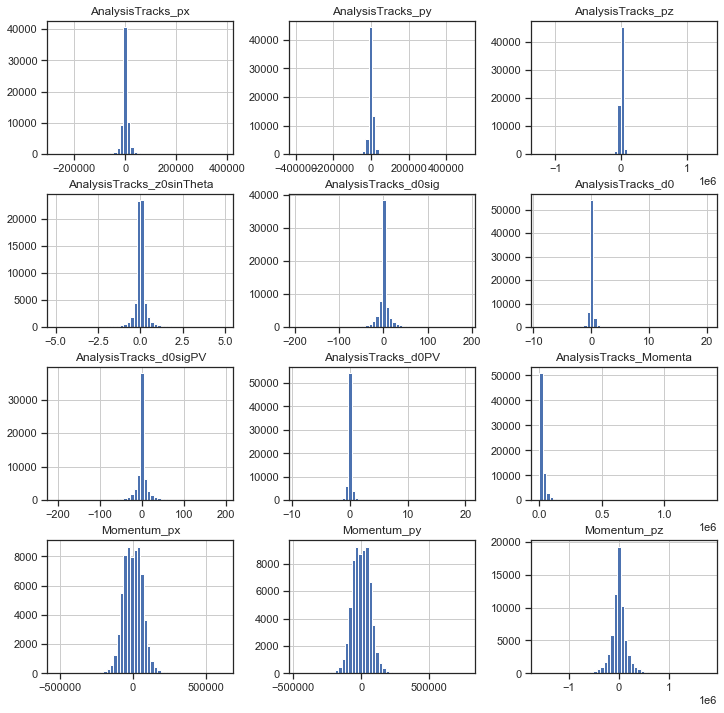

In [135]:
Data_Cart.hist(bins = 50,figsize = (12,12))
plt.show()

In [145]:
mi_scores_Transverse_Momentum = make_mi_scores(Track_Data,Bhad_Data["Transverse Momentum"])
mi_scores_Transverse_Momentum

AnalysisTracks_pt                0.077301
AnalysisTracks_d0sigPV           0.013264
AnalysisTracks_d0PV              0.011495
AnalysisTracks_d0sig             0.010674
AnalysisTracks_z0sinTheta        0.003075
AnalysisTracks_phi_angles        0.001387
AnalysisTracks_d0                0.001001
AnalysisTracks_pseudorapidity    0.000235
Name: MI Scores, dtype: float64

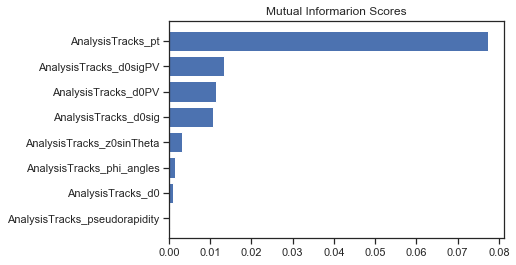

In [146]:
plt.Figure(dpi = 200,figsize = (12,12))
plot_mi_scores(mi_scores_Transverse_Momentum)

In [147]:
mi_scores_Pseudorapidity = make_mi_scores(Track_Data,Bhad_Data["Pseudorapidity"])
mi_scores_Pseudorapidity

AnalysisTracks_pseudorapidity    2.582023
AnalysisTracks_pt                0.036682
AnalysisTracks_z0sinTheta        0.020707
AnalysisTracks_phi_angles        0.010821
AnalysisTracks_d0sigPV           0.007715
AnalysisTracks_d0sig             0.004836
AnalysisTracks_d0PV              0.003493
AnalysisTracks_d0                0.000482
Name: MI Scores, dtype: float64

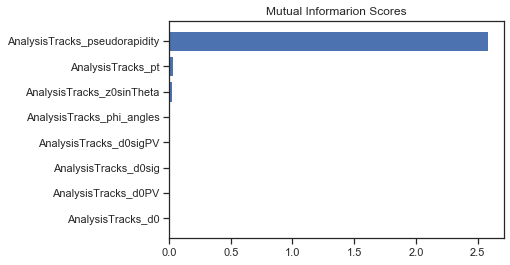

In [148]:
plt.Figure(dpi = 200, figsize = (8,5))
plot_mi_scores(mi_scores_Pseudorapidity)

In [149]:
mi_scores_Phi_Angle = make_mi_scores(Track_Data,Bhad_Data["Phi Angle"])
mi_scores_Phi_Angle

AnalysisTracks_phi_angles        2.878016
AnalysisTracks_d0sigPV           0.015992
AnalysisTracks_d0sig             0.011069
AnalysisTracks_d0PV              0.010285
AnalysisTracks_d0                0.010101
AnalysisTracks_pt                0.008671
AnalysisTracks_z0sinTheta        0.007928
AnalysisTracks_pseudorapidity    0.000000
Name: MI Scores, dtype: float64

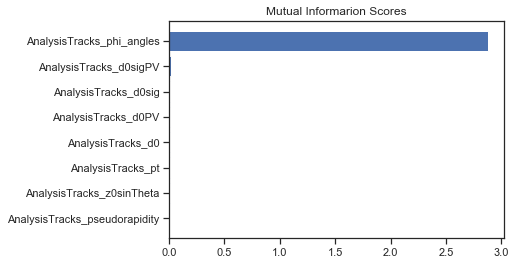

In [150]:
plt.Figure(dpi = 100, figsize = (12,12))
plot_mi_scores(mi_scores_Phi_Angle)

In [151]:
mi_scores_Momentum_px = make_mi_scores(Track_Cart_Data,Bhad_Cart_Data["Momentum_px"])
mi_scores_Momentum_px

AnalysisTracks_px            0.883970
AnalysisTracks_py            0.028839
AnalysisTracks_pz            0.004942
AnalysisTracks_d0sigPV       0.004232
AnalysisTracks_d0            0.003887
AnalysisTracks_d0PV          0.002113
AnalysisTracks_d0sig         0.001598
AnalysisTracks_z0sinTheta    0.000000
Name: MI Scores, dtype: float64

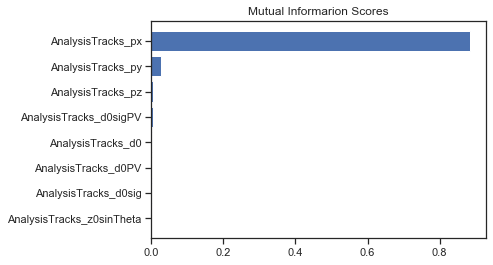

In [152]:
plt.Figure(dpi = 100, figsize = (12,12))
plot_mi_scores(mi_scores_Momentum_px)

In [153]:
mi_scores_Momentum_py = make_mi_scores(Track_Cart_Data,Bhad_Cart_Data["Momentum_py"])
mi_scores_Momentum_py

AnalysisTracks_py            0.889467
AnalysisTracks_px            0.024761
AnalysisTracks_d0sigPV       0.006242
AnalysisTracks_d0sig         0.005052
AnalysisTracks_pz            0.004134
AnalysisTracks_d0PV          0.003334
AnalysisTracks_d0            0.000867
AnalysisTracks_z0sinTheta    0.000464
Name: MI Scores, dtype: float64

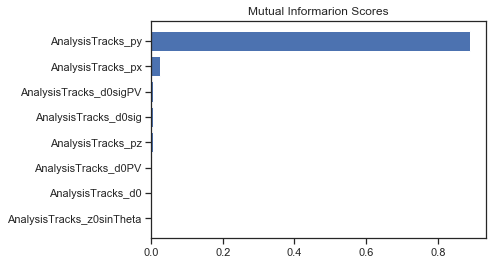

In [154]:
plt.Figure(dpi = 100, figsize = (12,12))
plot_mi_scores(mi_scores_Momentum_py)

In [155]:
mi_scores_Momentum_pz = make_mi_scores(Track_Cart_Data,Bhad_Cart_Data["Momentum_pz"])
mi_scores_Momentum_pz

AnalysisTracks_pz            1.003814
AnalysisTracks_py            0.011862
AnalysisTracks_z0sinTheta    0.011426
AnalysisTracks_px            0.009790
AnalysisTracks_d0sigPV       0.009359
AnalysisTracks_d0PV          0.005053
AnalysisTracks_d0sig         0.002619
AnalysisTracks_d0            0.000000
Name: MI Scores, dtype: float64

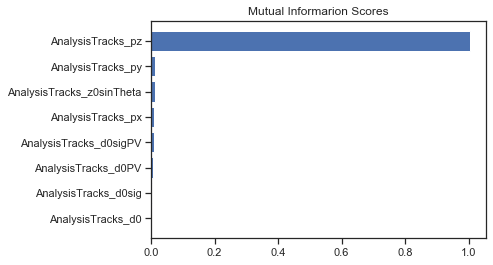

In [156]:
plt.Figure(dpi = 100, figsize = (12,12))
plot_mi_scores(mi_scores_Momentum_pz)

(68143, 32, 8)
(68143,)
68317.51904296875
[14728.2109375 3384.217041015625 39777.6875 1654.6444091796875
 745.1248779296875 2125.20849609375 5902.42578125 -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]


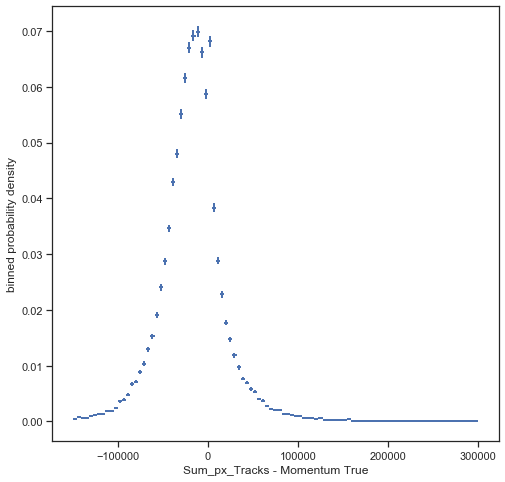

In [210]:
sum_tracks = np.sum(matchedtracks[:,:,0],axis = 1)
print(np.shape(tracks))
print(np.shape(sum_tracks))
print(sum_tracks[0])
print(matchedtracks[0,:,0])
binneddensity(sum_tracks-bhads[:,0],fixedbinning(-150000,300000,100),xlabel ="Sum_px_Tracks - Momentum True")

[21841.517861474793 -7248.836504590512 -43171.68392014959 ...
 7211.091337467378 4936.9388891229455 60956.643568672254]


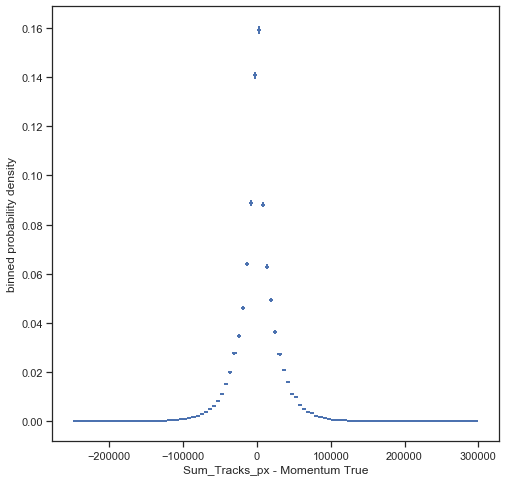

In [ ]:
sum_tracks_cart_px = np.ma.sum(tracks[:,:,0],axis = 1)
print(sum_tracks_cart_px)
binneddensity(sum_tracks_cart_px-bhads_cart[:,0],fixedbinning(-250000,300000,100),xlabel ="Sum_Tracks_px - Momentum True")

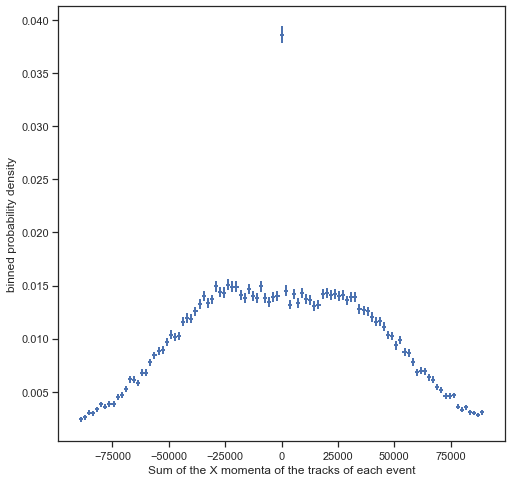

In [223]:
binneddensity(sum_tracks_cart_px,fixedbinning(-90000,90000,100),xlabel = "Sum of the X momenta of the tracks of each event")

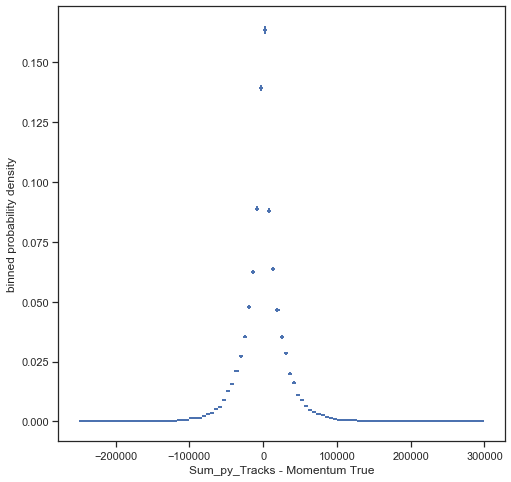

In [160]:
sum_tracks_cart_py = np.ma.sum(tracks[:,:,1],axis = 1)
binneddensity(sum_tracks_cart_py-bhads_cart[:,1],fixedbinning(-250000,300000,100),xlabel ="Sum_py_Tracks - Momentum True")

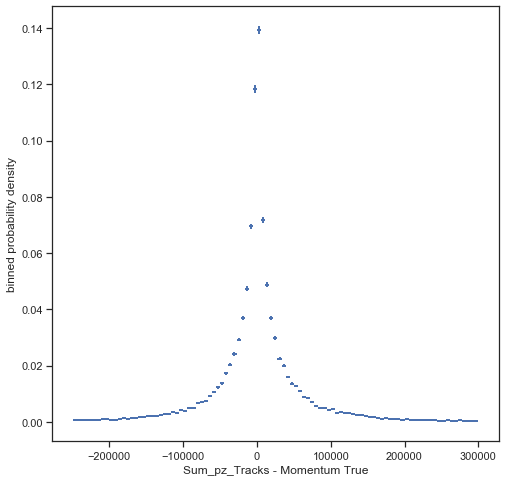

In [161]:
sum_tracks_cart_pz = np.ma.sum(tracks[:,:,2],axis = 1)
binneddensity(sum_tracks_cart_pz-bhads_cart[:,2],fixedbinning(-250000,300000,100),xlabel ="Sum_pz_Tracks - Momentum True")

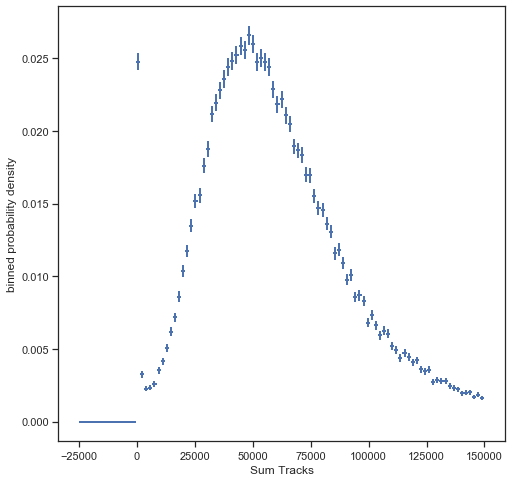

In [162]:
binneddensity(sum_tracks,fixedbinning(-25000,150000,100),xlabel = "Sum Tracks")

In [163]:
Covariance_matrix = Data.corr()
Covariance_matrix["Transverse Momentum"].sort_values(ascending = False)

Transverse Momentum              1.000000
AnalysisTracks_pt                0.336558
AnalysisTracks_phi_angles        0.002079
Phi Angle                        0.001107
AnalysisTracks_z0sinTheta        0.000907
Pseudorapidity                  -0.002537
AnalysisTracks_pseudorapidity   -0.002617
AnalysisTracks_d0sigPV          -0.003427
AnalysisTracks_d0sig            -0.003693
AnalysisTracks_d0               -0.007061
AnalysisTracks_d0PV             -0.007123
Name: Transverse Momentum, dtype: float64

In [164]:
Covariance_matrix = Data_Cart.corr()
Covariance_matrix["Momentum_px"].sort_values(ascending = False)

Momentum_px                  1.000000
AnalysisTracks_px            0.703548
AnalysisTracks_d0sigPV       0.010792
AnalysisTracks_d0sig         0.010649
AnalysisTracks_d0            0.008114
AnalysisTracks_d0PV          0.008049
AnalysisTracks_Momenta      -0.001313
Momentum_pz                 -0.002614
AnalysisTracks_pz           -0.003812
Momentum_py                 -0.004643
AnalysisTracks_z0sinTheta   -0.005928
AnalysisTracks_py           -0.008998
Name: Momentum_px, dtype: float64

In [165]:
Covariance_matrix = Data_Cart.corr()
Covariance_matrix["Momentum_py"].sort_values(ascending = False)

Momentum_py                  1.000000
AnalysisTracks_py            0.704210
AnalysisTracks_d0PV          0.003629
AnalysisTracks_d0            0.003561
AnalysisTracks_d0sig         0.001883
AnalysisTracks_d0sigPV       0.001545
AnalysisTracks_Momenta       0.001101
Momentum_pz                  0.000151
AnalysisTracks_pz           -0.001271
AnalysisTracks_z0sinTheta   -0.002794
Momentum_px                 -0.004643
AnalysisTracks_px           -0.010475
Name: Momentum_py, dtype: float64

In [166]:
Covariance_matrix = Data_Cart.corr()
Covariance_matrix["Momentum_pz"].sort_values(ascending = False)

Momentum_pz                  1.000000
AnalysisTracks_pz            0.618595
AnalysisTracks_Momenta       0.007214
AnalysisTracks_z0sinTheta    0.006334
AnalysisTracks_d0PV          0.004228
AnalysisTracks_d0            0.004082
Momentum_py                  0.000151
AnalysisTracks_py           -0.000694
AnalysisTracks_d0sigPV      -0.002273
AnalysisTracks_d0sig        -0.002294
Momentum_px                 -0.002614
AnalysisTracks_px           -0.002678
Name: Momentum_pz, dtype: float64

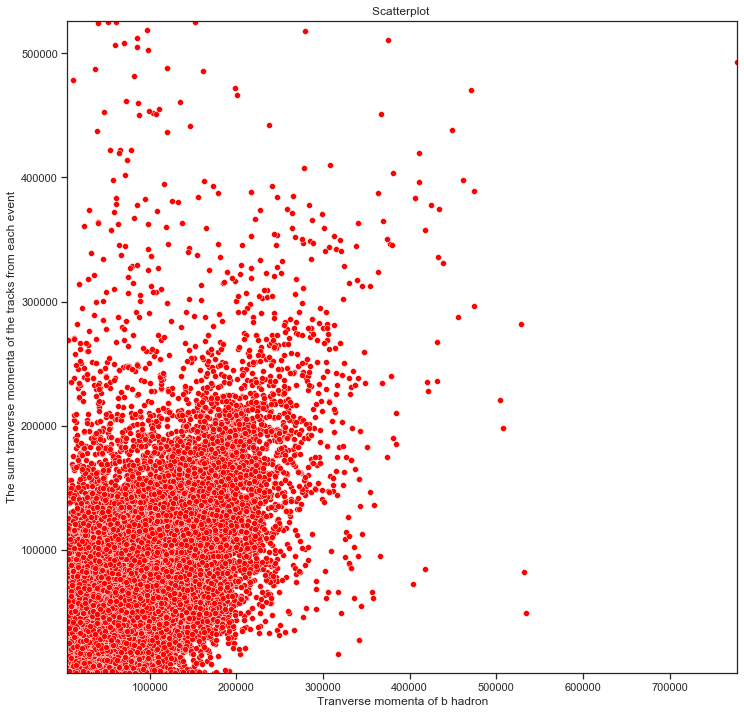

In [261]:
fig,ax = plt.subplots(figsize = (12,12))
sns.scatterplot(
    x = bhads[:,0],
    y = sum_tracks,
    color = "red"
)
ax.set_title("Scatterplot ")
ax.set_xlim([np.min(bhads[:,0]),np.max(bhads[:,0])])
ax.set_ylim([np.min(matchedtracks[:,0,0]),np.max(matchedtracks[:,0,0])])
ax.set_ylabel("The sum tranverse momenta of the tracks from each event")
ax.set_xlabel("Tranverse momenta of b hadron")
plt.show()

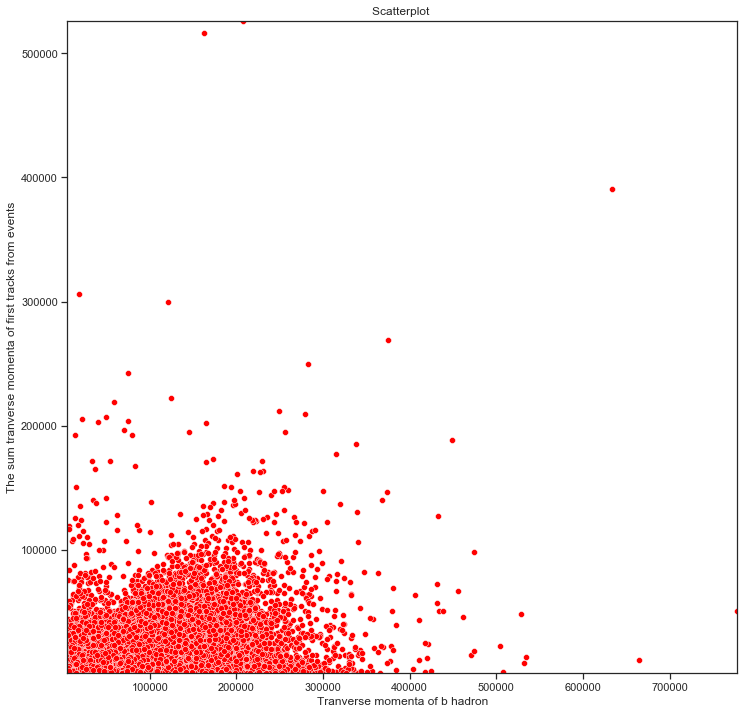

In [252]:
fig,ax = plt.subplots(figsize = (12,12))
sns.scatterplot(
    x = bhads[:,0],
    y = matchedtracks[:,0,0],
    color = "red"
)
ax.set_title("Scatterplot ")
ax.set_xlim([np.min(bhads[:,0]),np.max(bhads[:,0])])
ax.set_ylim([np.min(matchedtracks[:,0,0]),np.max(matchedtracks[:,0,0])])
ax.set_ylabel("The tranverse momenta of first tracks from events")
ax.set_xlabel("Tranverse momenta of b hadron")
plt.show()

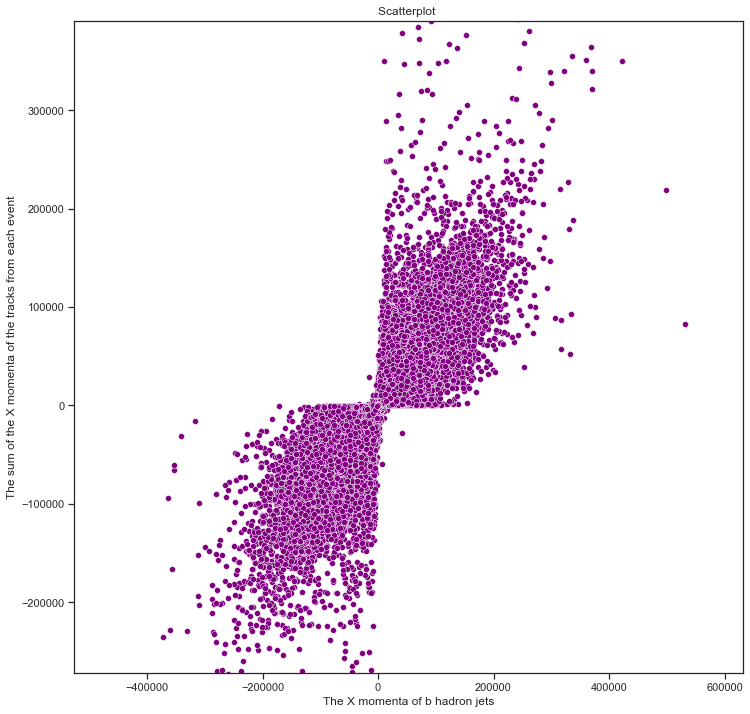

In [262]:
fig,ax = plt.subplots(figsize = (12,12))
sns.scatterplot(
    x = bhads_cart[:,0],
    y = sum_tracks_cart_px,
    color = "purple"
)
ax.set_title("Scatterplot ")
ax.set_xlim([np.min(bhads_cart[:,0]),np.max(bhads_cart[:,0])])
ax.set_ylim([np.min(tracks[:,0,0]),np.max(tracks[:,0,0])])
ax.set_ylabel("The sum of the X momenta of the tracks from each event")
ax.set_xlabel("The X momenta of b hadron jets")
plt.show()

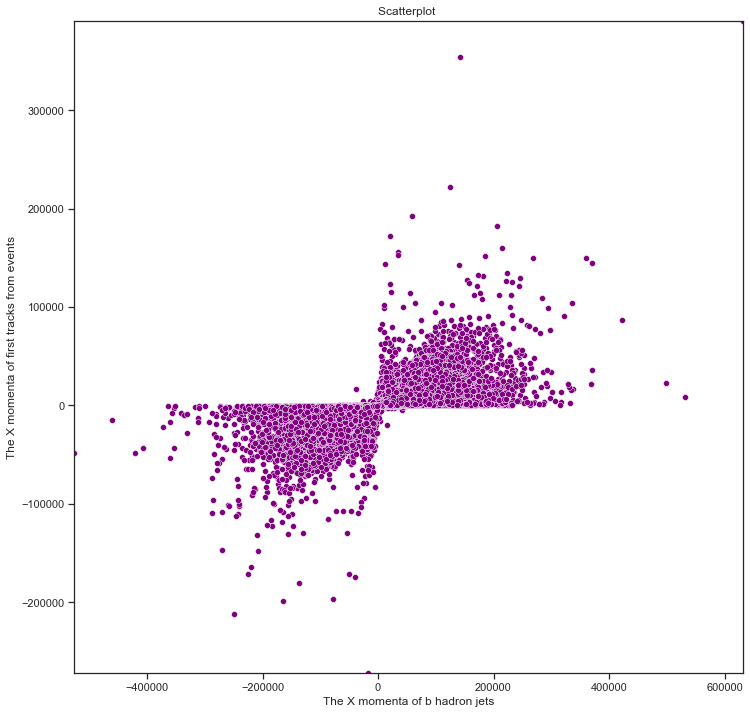

In [255]:
fig,ax = plt.subplots(figsize = (12,12))
sns.scatterplot(
    x = bhads_cart[:,0],
    y = tracks[:,0,0],
    color = "purple"
)
ax.set_title("Scatterplot ")
ax.set_xlim([np.min(bhads_cart[:,0]),np.max(bhads_cart[:,0])])
ax.set_ylim([np.min(tracks[:,0,0]),np.max(tracks[:,0,0])])
ax.set_ylabel("The X momenta of first tracks from events")
ax.set_xlabel("The X momenta of b hadron jets")
plt.show()

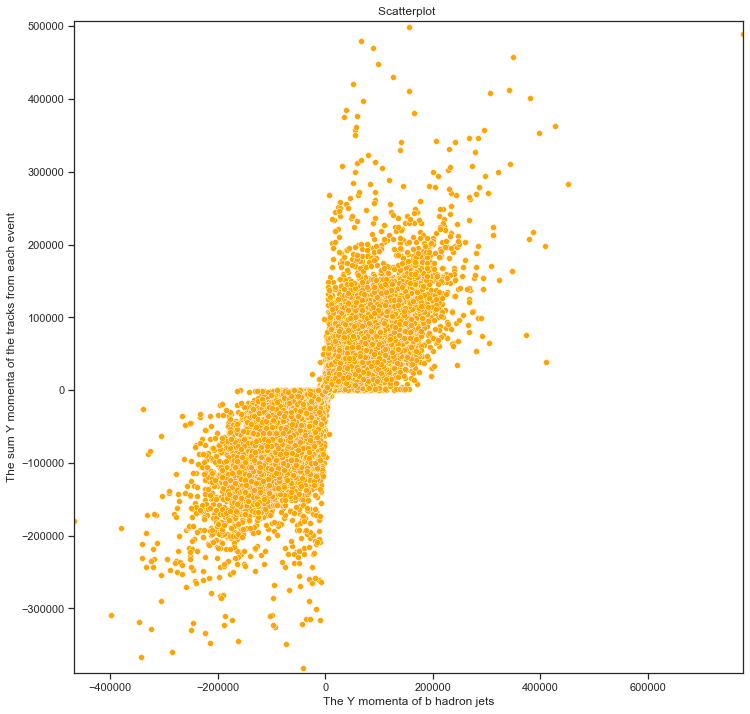

In [263]:
fig,ax = plt.subplots(figsize = (12,12))
sns.scatterplot(
    x = bhads_cart[:,1],
    y = sum_tracks_cart_py,
    color = "orange"
)
ax.set_title("Scatterplot ")
ax.set_xlim([np.min(bhads_cart[:,1]),np.max(bhads_cart[:,1])])
ax.set_ylim([np.min(tracks[:,0,1]),np.max(tracks[:,0,1])])
ax.set_ylabel("The sum Y momenta of the tracks from each event")
ax.set_xlabel("The Y momenta of b hadron jets")
plt.show()

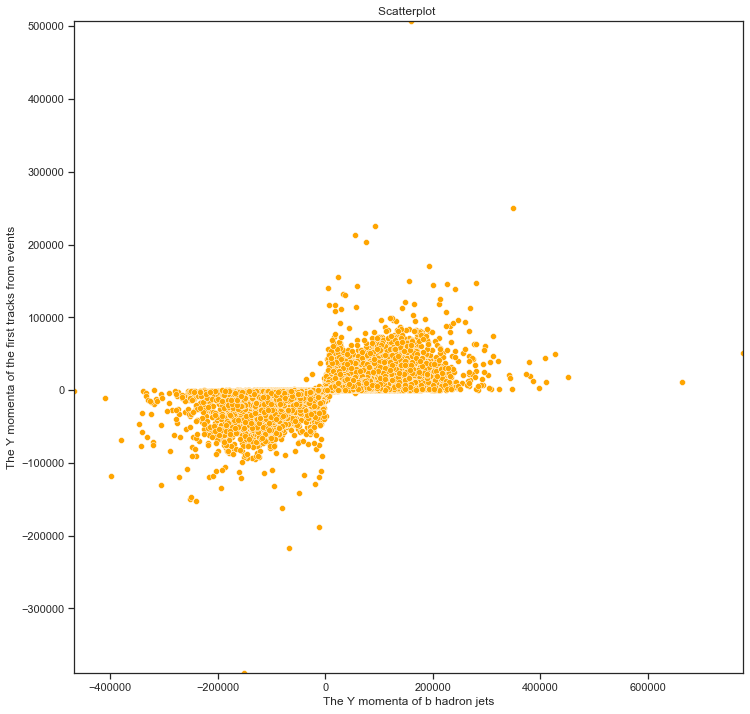

In [259]:
fig,ax = plt.subplots(figsize = (12,12))
sns.scatterplot(
    x = bhads_cart[:,1],
    y = tracks[:,0,1],
    color = "orange"
)
ax.set_title("Scatterplot ")
ax.set_xlim([np.min(bhads_cart[:,1]),np.max(bhads_cart[:,1])])
ax.set_ylim([np.min(tracks[:,0,1]),np.max(tracks[:,0,1])])
ax.set_ylabel("The Y momenta of the first tracks from events")
ax.set_xlabel("The Y momenta of b hadron jets")
plt.show()

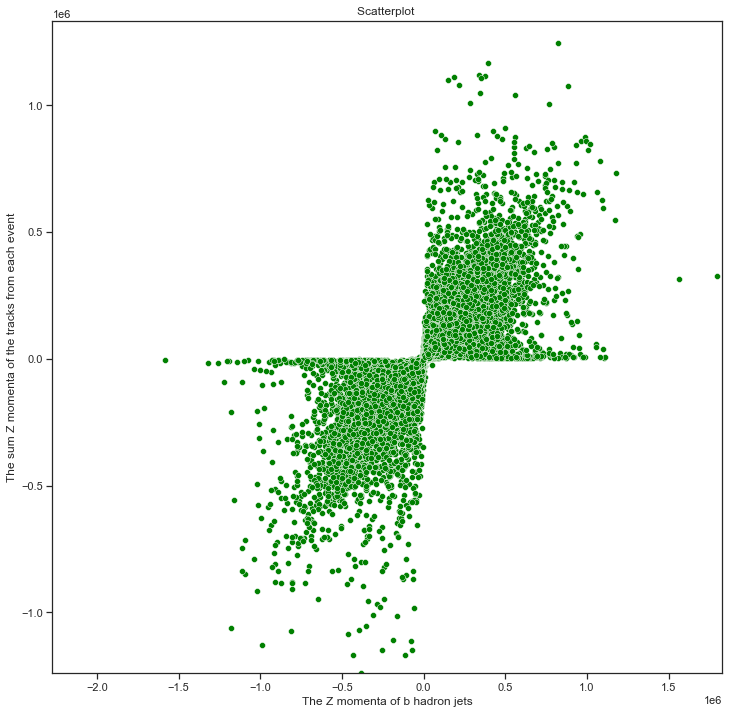

In [264]:
fig,ax = plt.subplots(figsize = (12,12))
sns.scatterplot(
    x = bhads_cart[:,2],
    y = sum_tracks_cart_pz,
    color = "green"
)
ax.set_title("Scatterplot ")
ax.set_xlim([np.min(bhads_cart[:,2]),np.max(bhads_cart[:,2])])
ax.set_ylim([np.min(tracks[:,0,2]),np.max(tracks[:,0,2])])
ax.set_ylabel("The sum Z momenta of the tracks from each event")
ax.set_xlabel("The Z momenta of b hadron jets")
plt.show()

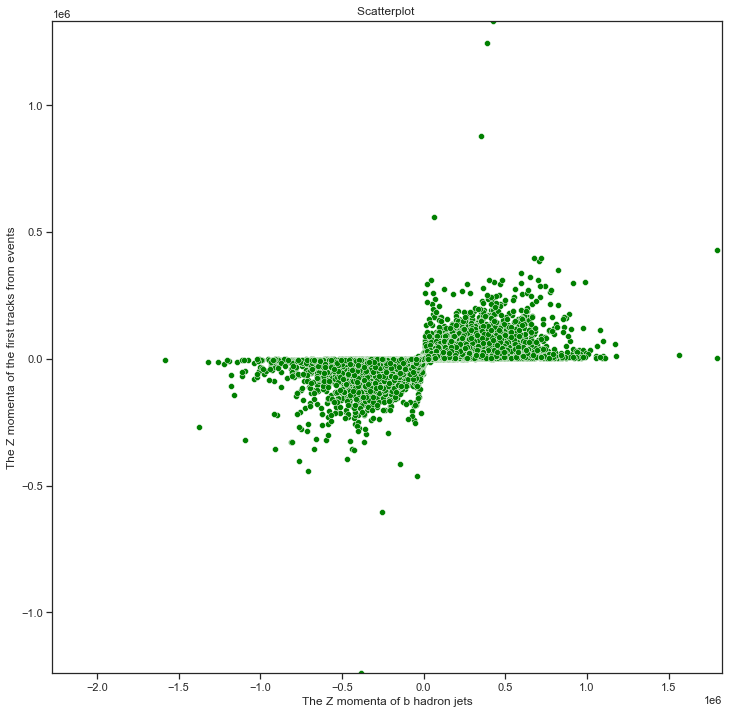

In [260]:
fig,ax = plt.subplots(figsize = (12,12))
sns.scatterplot(
    x = bhads_cart[:,2],
    y = tracks[:,0,2],
    color = "green"
)
ax.set_title("Scatterplot ")
ax.set_xlim([np.min(bhads_cart[:,2]),np.max(bhads_cart[:,2])])
ax.set_ylim([np.min(tracks[:,0,2]),np.max(tracks[:,0,2])])
ax.set_ylabel("The Z momenta of the first tracks from events")
ax.set_xlabel("The Z momenta of b hadron jets")
plt.show()

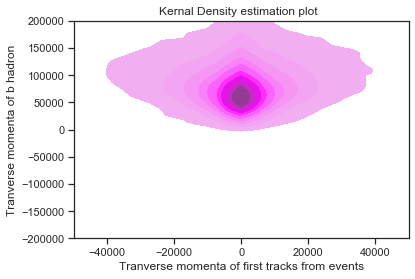

In [ ]:
sns.kdeplot(
    x = tracks[:,0,0],
    y = bhads[:,0],
    color = "purple",
    fill = True

)
ax = plt.gca()
ax.set_title("Kernal Density estimation plot  ")
ax.set_xlim([-50000,50000])
ax.set_ylim([-200000,200000])
ax.set_xlabel("Tranverse momenta of first tracks from events")
ax.set_ylabel("Tranverse momenta of b hadron")
plt.show()

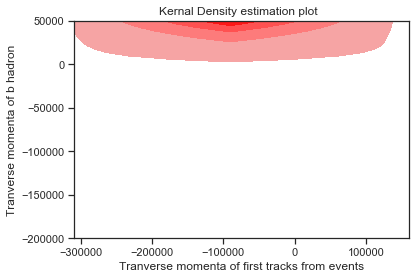

In [ ]:
sns.kdeplot(
    x = np.sum(tracks[:,:,0],axis = 1),
    y = bhads[:,0],
    fill = True,
    color = "red",
)
ax = plt.gca()
ax.set_title("Kernal Density estimation plot  ")
ax.set_xlim([-310000,160000])
ax.set_ylim([-200000,50000])
ax.set_xlabel("Tranverse momenta of first tracks from events")
ax.set_ylabel("Tranverse momenta of b hadron")
plt.show()

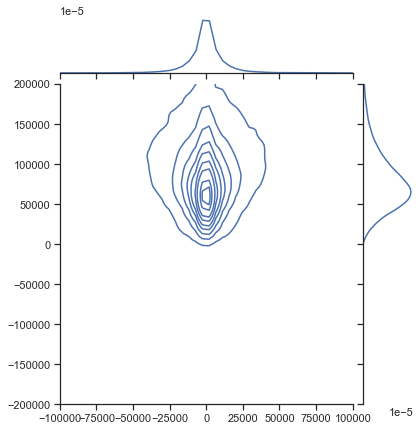

In [ ]:
sns.jointplot(
    x = tracks[:,0,1],
    y = bhads[:,0],
    xlim = [-100000, 100000],
    ylim = [-200000, 200000],
    kind = "kde",
)
plt.show()

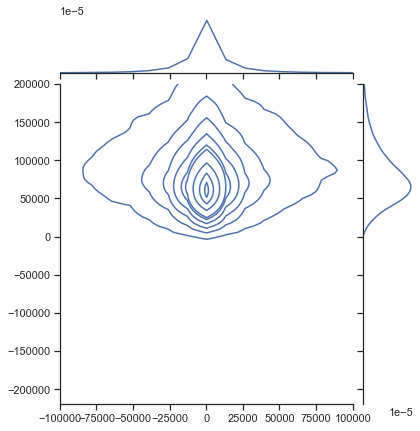

In [ ]:
sns.jointplot(
    x = tracks[:,0,2],
    y = bhads[:,0],
    xlim = [-100000, 100000],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()

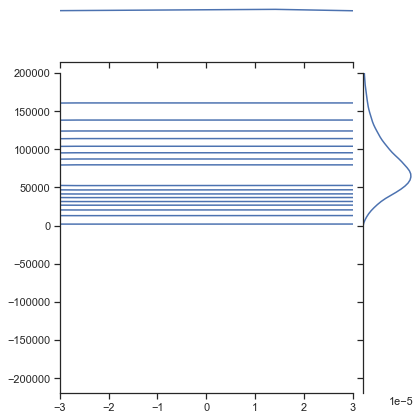

In [ ]:
sns.jointplot(
    x = tracks[:,0,3],
    y = bhads[:,0],
    xlim = [-3, 3],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()

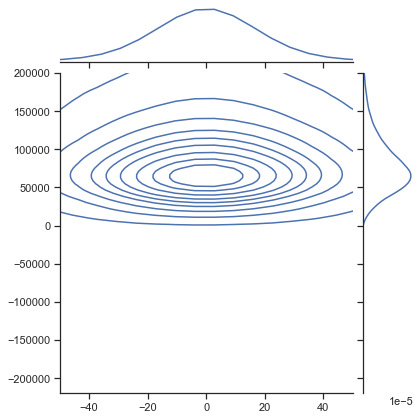

In [ ]:
sns.jointplot(
    x = tracks[:,0,4],
    y = bhads[:,0],
    xlim = [-50, 50],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()

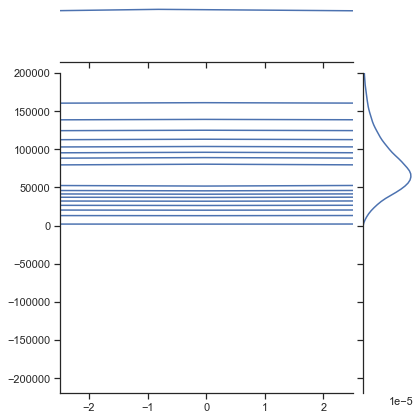

In [ ]:
sns.jointplot(
    x = tracks[:,0,5],
    y = bhads[:,0],
    xlim = [-2.5, 2.5],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()

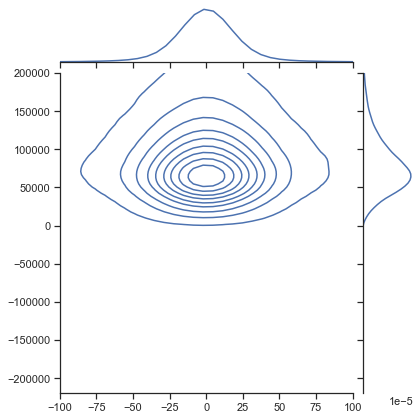

In [ ]:
sns.jointplot(
    x = tracks[:,0,6],
    y = bhads[:,0],
    xlim = [-100, 100],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()

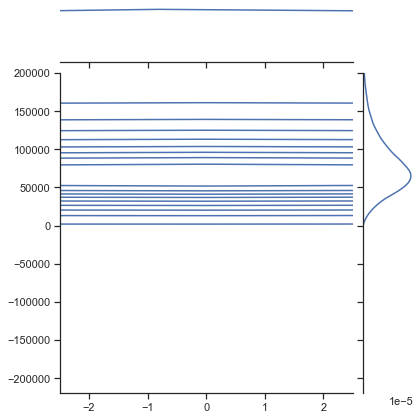

In [ ]:
sns.jointplot(
    x = tracks[:,0,7],
    y = bhads[:,0],
    xlim = [-2.5, 2.5],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()